In [12]:
from utils import log_out, plot_graphs, DataReader
from carrot import Carrot
from booster import Gradient_Boosting

from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from tqdm import tqdm
%matplotlib inline

In [14]:
reader = DataReader()
X_train, Y_train = reader.get(dtype = "train", ttype = "classification")
X_test, Y_test = reader.get(dtype = "test", ttype = "classification")

 36%|███▌      | 2561/7093 [00:00<00:00, 25597.45it/s]

Start reading data ...


 29%|██▉       | 2954/10056 [00:00<00:00, 29531.44it/s]

End reading data ...
Start reading data ...


100%|██████████| 10056/10056 [00:00<00:00, 26976.41it/s]


End reading data ...


Learning estimator number: 1/40; Accuracy error on train dataset: 0.8805864937262089; MSE error on train dataset: 0.376709055971871/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Learning estimator number: 39/40; Accuracy error on train dataset: 0.9823769913999718; MSE error on train dataset: 0.0037924631664504483

my Accuracy: 0.9308


 25%|██▌       | 1/4 [02:47<08:23, 167.97s/it]

sklearn Accuracy: 0.9548


Learning estimator number: 49/50; Accuracy error on train dataset: 0.9826589595375722; MSE error on train dataset: 0.0028115560024599188

my Accuracy: 0.9296


 50%|█████     | 2/4 [03:45<03:45, 112.74s/it]

sklearn Accuracy: 0.9557


Learning estimator number: 59/60; Accuracy error on train dataset: 0.9840688002255745; MSE error on train dataset: 0.0022019361356281062

my Accuracy: 0.9352


 75%|███████▌  | 3/4 [04:43<01:34, 94.40s/it] 

sklearn Accuracy: 0.9571


Learning estimator number: 69/70; Accuracy error on train dataset: 0.9854786409135767; MSE error on train dataset: 0.0017612137188771349

my Accuracy: 0.9340


100%|██████████| 4/4 [05:45<00:00, 86.26s/it]

sklearn Accuracy: 0.9592


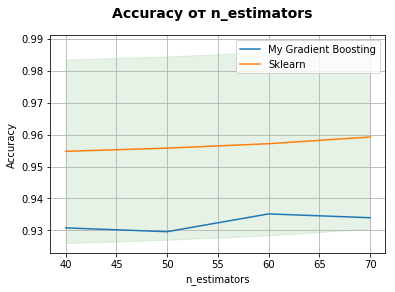

In [15]:
losses_my = list()
losses_sklearn = list()
trees_num = [x*10 for x in range(4,8)]

#accuracy on train
estimators_list = None
global_leaf_numbers = None
F = None

for i in tqdm(trees_num):
    algo1 = Gradient_Boosting(n_estimators=i, min_samples_split=4, max_depth=3,
                              estimators_list = estimators_list ,
                              F = F,
                              global_leaf_numbers = global_leaf_numbers)
    estimators_list, F, global_leaf_numbers  = algo1.fit(X_train, Y_train)
    acs = accuracy_score(Y_test, algo1.predict(X_test))
    losses_my.append(acs)
    print("my Accuracy: %.4f" % acs)

    algo = GradientBoostingClassifier(n_estimators=i,
                                     max_depth=3,
                                     min_samples_split=4, 
                                     loss="exponential")
    algo.fit(X_train, Y_train)
    acs = accuracy_score(Y_test, algo.predict(X_test))
    losses_sklearn.append(acs)
    print("sklearn Accuracy: %.4f" % acs)

plot_graphs(trees_num, losses_my, losses_sklearn)